<a href="https://colab.research.google.com/github/francescodisalvo05/Data-Science-Lab-Exercises/blob/main/6-Laboratory-12-11-2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-Laboratory-12-11-2020
 

> Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia <br />
Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## Wine classification
In this exercise, you will use sklearn’s DecisionTreeClassifierto build a decision tree for the winedataset.

1. Load the wine dataset from sklearn. Then, based on your X and y, answer the following questions:
  - How many records are available?
  - Are there missing values?
  - How many elements does each class contain?

In [126]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]

feature_names = dataset["feature_names"]

In [127]:
import numpy as np
from collections import Counter

print("Recorda available\t",len(X))
print("X null values\t\t", np.isnan(X).sum())
print("y null values\t\t",np.isnan(y).sum())
print("y classes\t\t",dict(Counter(y)))

Recorda available	 178
X null values		 0
y null values		 0
y classes		 {0: 59, 1: 71, 2: 48}


2. Create a DecisionTreeClassifier object with the default configuration (i.e. without passing anyparameters to the constructor). Train the classifier using your X and y.

In [112]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

3. Now that you have created a tree, you can visualize it.

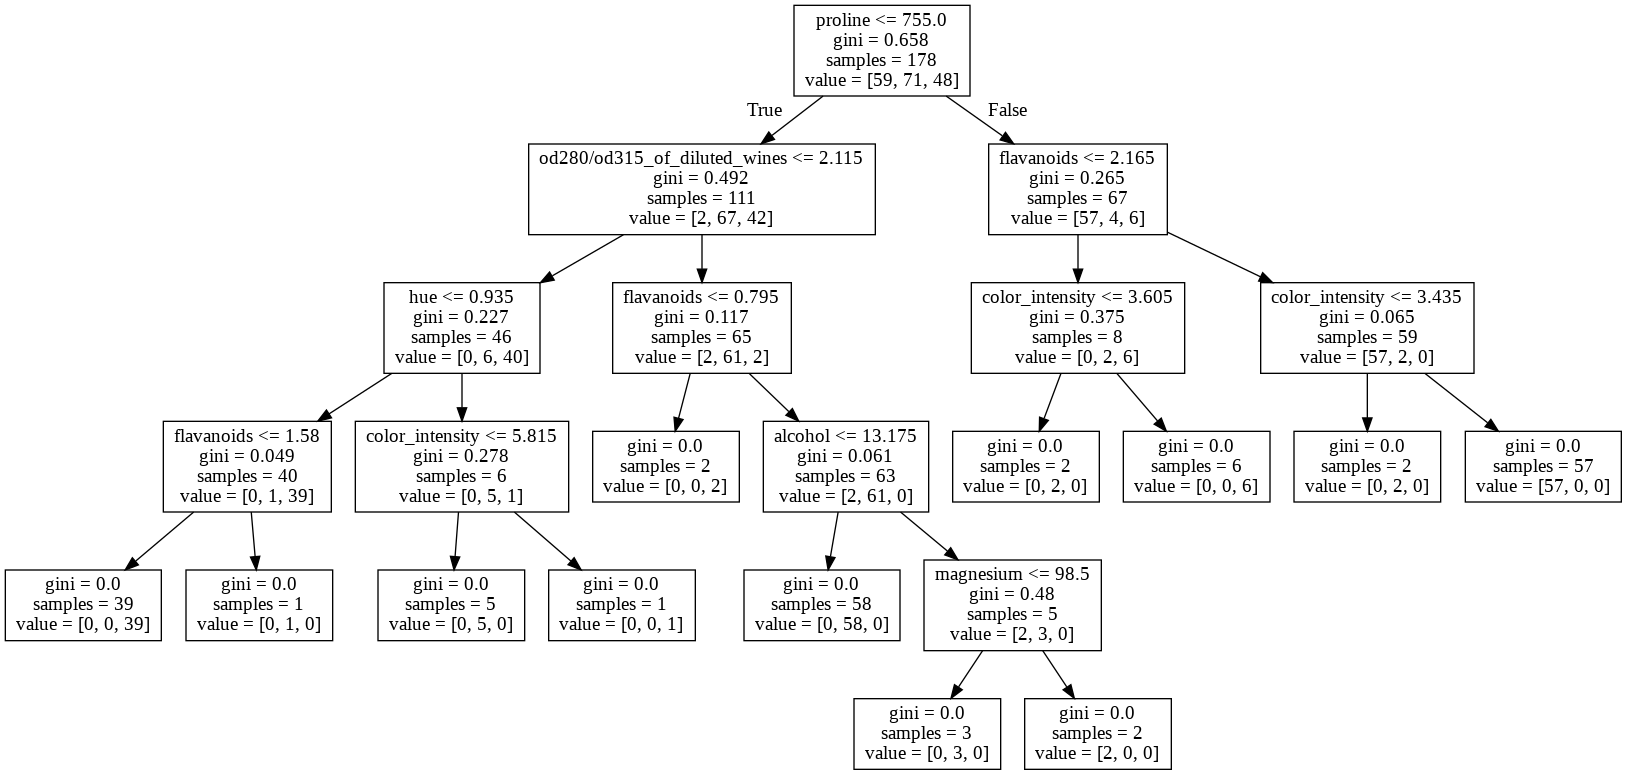

In [113]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_code = export_graphviz(clf, feature_names=dataset["feature_names"])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

4. Given the dataset X, you can get the predictions of the classifier (one for each entry in X). Then, use the accuracy_score() function to compute the accuracy between two lists of values. You can already compute the accuracy of your classifier. What result do you get? Does this result seem particularly high/low? Why do you think that is?

In [128]:
from sklearn.metrics import accuracy_score

y_pred= clf.predict(X)
acc = accuracy_score(y, y_pred)
print(acc)

0.9831460674157303


Well, as I expected, the accuracy is quite high (100%), but of course the reason is that we tested the classifier with the same data used for training it. So, the decision tree is based on the same data that we have used for the test.
<br /><br />
5. Now, we can split our dataset into a training set and a test set.

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y)

6. Now, train a new model using (X_train, y_train). Then, compute the accuracy with (X_test,y_test). How does this value compare to the previously computed one? Is this a more reasonablevalue? Why? You can also compute other metrics (e.g. precision, recall,F1score) using the respective functions

In [130]:
# I'll use the previous one

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9166666666666666


In [131]:
from sklearn.metrics import precision_recall_fscore_support

p, r, f, s = precision_recall_fscore_support(y_test,y_pred)

p, r, f

(array([1.        , 0.82352941, 1.        ]),
 array([0.91666667, 1.        , 0.8       ]),
 array([0.95652174, 0.90322581, 0.88888889]))

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.82      1.00      0.90        14
           2       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



7. In this exercise, you will perform a “grid search”: you will define a set of possible config-urations and, for each configuration, build a classifier. Then, you will test the performance of each classifier and identify that configuration that produces the best model.
<br /><br />
For example, we can identify these two parameters:
  - max_depth, which defines the maximum depth of the decision tree, can be set toNone(i.e.unbounded depth), or to values such as 2, 4, 8 (we already know from previous exercises theapproximate depth the tree can reach with this dataset)  
  - splitter, which can be set to either best(in which case, for each split, the algorithm will tryall possible splits), or random(in this case, the algorithm will try N random splits on various features and select the best one)

In [119]:
from sklearn.model_selection import ParameterGrid

# hyperparams
params = {
    "max_depth" : [None, 2, 4, 8],
    "splitter" : ["best","random"]
}

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

for config in ParameterGrid(params):
  print(">>>",config)
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))

>>> {'max_depth': None, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      0.82      0.87        17
           2       0.77      1.00      0.87        10

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.90        36
weighted avg       0.90      0.89      0.89        36

>>> {'max_depth': None, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      0.88      0.88        17
           2       0.82      0.90      0.86        10

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36

>>> {'max_depth': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         

it seems that the best configuration is {'max_depth': 4, 'splitter': 'random'}

8. Since we used our test data to select the model, you may be overfitting on the test data (you may have selected the configuration that works best for the test set, but which may not be as good on new data). Typically, you do not want to use the test set for tuning the model’s hyperparameters, since the test set should only be used as a final evaluation. For this reason, datasets are typically splitted into : Training set, Validation set, Test set. <br /><br />
However, it often happens that only a limited amount of data is available. In these cases, it is wasteful to only use a small fraction of the dataset for the actual training. In these cases, cross-validationcanbe used to “get rid” of the validation set.

In [139]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
#   be seen by the classifier during the training/validation phases)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,  y, test_size=0.2,stratify=y)
kf = KFold(5)

# hyperparams
params = {
    "max_depth" : [None, 2, 4, 8],
    "splitter" : ["best","random"],
    "min_impurity_decrease": [0, .01, .03, .07, .09, .11]
}

mean_acc = []
for config in ParameterGrid(params):
  # accuracy list
  k_acc = []
  # 5-fold cross-validation# X and y are the arrays to be split
  for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_valid)
    
    k_acc.append(accuracy_score(y_valid, y_pred))
  
  mean_acc.append( sum(k_acc)/len(k_acc) )

max(mean_acc)

0.9088669950738917

In [141]:
# the best configuration should be for {'max_depth': 4, 'splitter': 'random'}
clf = DecisionTreeClassifier(max_depth=4, splitter='random')

# copied by the proposal solution - I did it with a way more complex structure
best_config = list(ParameterGrid(params))[np.argmax(mean_acc)]

clf = DecisionTreeClassifier(**best_config)
clf.fit(X_train_valid,y_train_valid)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9166666666666666


9. (*) Given a decision tree, we can assign an importance to each split of the tree. The importance of a split can be computed as the decrease in impurity achieved by it. The following are some definitions we will use to define the impurity decrease of a node P:
  - iP is the impurity (e.g. GINI index) of the node (parent)
  - iL and iR are respectively the impurities of the left and right children ofP
  - |P| is the cardinality of the parent node (i.e. the number of elements contained)
  - |L| and |R| are the cardinalities of the left and right children
  - N is the total number of observations in the dataset 
  
  A possible way of computing the impurity decrease I(P) of P is the following: <br />
  <center>$I(P) = \frac {|P|} N i_P - \frac {|L|} N i_L - \frac {|R|} N i_R$</center>

  In this exercise you will build a function that, given a tree, extracts all the feature importances. To do this, you should have some prior knowledge of how binary trees work and, in particular,how a pre-order tree traversal works. This is because the DecisionTreeClassifierclass has an attribute, clf.tree_, which contains both the features used at each split (clf.tree_.feature)and the impurity for each split (clf.tree_.impurity). These are arrays of the pre-order traversal of the tree. From these, you should build the feature importance for each split.

## Synthetic dataset

1. Load the synthetic dataset. This dataset has two features and a class label. Use matplotlib’s scatter() function to plot the dataset on a 2D plane and color the points based on their class label. How do you expect a decision tree to approach data distributed inthis way?

In [142]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv')
df.sample(5)

,x0,x1,label
357,4.489401,6.686835,0
457,2.953395,7.355975,0
393,8.001298,4.738087,0
420,6.701188,5.163128,0
282,4.675145,1.249988,1
